# **Task 3, Cohort 3**
**Submitted by Ajeboriogbon Samuel A.** <br>
**Student Number: DS/2025/TC3/198**

In [1]:
import pandas as pd
import numpy as np

## Data Preparation

In [19]:
orders_details = pd.read_csv(r"C:\Users\User\Documents\TechCrush C3\pizza_sales\order_details.csv")

orders_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
orders = pd.read_csv(r"C:\Users\User\Documents\TechCrush C3\pizza_sales\orders.csv")
pizzas = pd.read_csv(r"C:\Users\User\Documents\TechCrush C3\pizza_sales\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\User\Documents\TechCrush C3\pizza_sales\pizza_types.csv", encoding='latin1')
data_dict = pd.read_csv(r"C:\Users\User\Documents\TechCrush C3\pizza_sales\data_dictionary.csv")

In [21]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [11]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [12]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [14]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [15]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [17]:
data_dict

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


In [23]:
df = pd.merge(orders, orders_details, how='inner', on='order_id')

df.head()

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [24]:
df = pd.merge(df, pizzas, how='inner', on='pizza_id')

df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00


In [25]:
df = pd.merge(df, pizza_types, how = 'inner', on='pizza_type_id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [26]:
df.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


## Data Analysis

*I'm sorry ma'am but I'm bad at commenting but i made the code explanable as possible*

**Q1. What is the total revenue/sales?**

In [33]:
df['total_bill'] = df['quantity'] * df['price']

df[df['quantity']==2].head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,total_bill
48,17,2015-01-01,13:53:00,49,mediterraneo_m,2,mediterraneo,M,16.00,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",32.0
211,91,2015-01-02,15:14:43,212,bbq_ckn_l,2,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",41.5
222,92,2015-01-02,15:17:02,223,the_greek_m,2,the_greek,M,16.00,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",32.0
245,105,2015-01-02,18:12:01,246,hawaiian_s,2,hawaiian,S,10.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",21.0
444,189,2015-01-03,20:12:14,445,big_meat_s,2,big_meat,S,12.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",24.0


In [34]:
df['total_bill'].sum()

817860.05

**Ans to Q1:** Total Revenues/Sales is 817,860.05 USD

It's necessary to note that the Price column is recorded in unit and this can be easily known from the data summary *(df.describe())* where the max price is 35.95, so it's needed that we multiply the quatity order by the unit price to get total  bill for an order.

---

**Q2. Find the total quantity sold.**

In [36]:
df['quantity'].sum()

49574

**Ans to Q2:** Total Quantity of pizza sold is 49574 units

---

**Q3. Find the total orders.**

In [40]:
df['order_id'].value_counts().sum()

48620

**Ans to Q3:** Total orders is 48620

---

**Q4. How many pizza types do they sell?**

In [42]:
df['pizza_type_id'].unique()

array(['hawaiian', 'classic_dlx', 'five_cheese', 'ital_supr', 'mexicana',
       'thai_ckn', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'green_garden', 'ital_cpcllo', 'spicy_ital', 'spin_pesto',
       'veggie_veg', 'southw_ckn', 'cali_ckn', 'pepperoni', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'calabrese', 'ital_veggie', 'mediterraneo', 'peppr_salami',
       'spinach_fet', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [43]:
df['pizza_type_id'].nunique()

32

**Ans to Q4:** They sell 32 different types of pizza

---

**Q5. Find the average price of the pizzas.**

In [44]:
df['price'].mean()

16.494132044426163

**Ans to Q5:** The average price of pizza sold is 16.5 USD

---

**Q6. What are the peak hours of sales?**

In [74]:
df['time'].value_counts().head(10)

time
12:32:00    26
11:59:10    24
12:53:29    23
12:52:36    23
12:26:04    23
12:25:12    21
13:31:27    21
11:57:15    21
11:50:01    21
13:58:37    20
Name: count, dtype: int64

In [64]:
#df['time']
hr = pd.to_datetime(df['time'])
#df.info()

C:\Users\User\AppData\Local\Temp\ipykernel_14940\998997564.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr = pd.to_datetime(df['time'])


In [60]:
hr.iloc[0]

Timestamp('2025-09-23 11:38:36')

In [71]:
hr =  hr.apply(lambda x: x.hour)

hr.head()

0    11
1    11
2    11
3    11
4    11
Name: time, dtype: int64

In [73]:
hr.value_counts().head(5)

time
12    6543
13    6203
18    5359
17    5143
19    4350
Name: count, dtype: int64

**Ans to Q6:** Hmm, this is interesting. So after conversion to hours, the 12th hour is the peak hour of sales closely followed by the 13th hour of the day.

Meanwhile, it is also worthy to note that the 18th and 17th hour of the day are the next peak hours of sales with some relatively high numbers

This likely indicates that orders for pizzas come in the most during break hours say, 12pm to 1pm and the 2nd best time pizzas order come in is just after work around 5 to 6pm

---

**Q7. Find the total sales made on each day of the week. Which day of the week is when sales
are made the most?**

In [87]:
df['day_of_week'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['day_of_week'].apply(lambda x: x.day_of_week)
df['day_of_week'].head()

0    3
1    3
2    3
3    3
4    3
Name: day_of_week, dtype: int64

In [88]:
df['day_of_week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [91]:
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

df['day_of_week'] = df['day_of_week'].map(days)
df['day_of_week'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_of_week, dtype: object

In [95]:
sales_per_day = df.groupby('day_of_week')['total_bill'].sum()

sales_per_day.sort_values(ascending=False)

day_of_week
Thursday     136073.90
Wednesday    123528.50
Friday       123182.40
Tuesday      114408.40
Monday       114133.80
Sunday       107329.55
Saturday      99203.50
Name: total_bill, dtype: float64

**Ans to Q7:** The Total sales made per day is calculated above but the day of the week with the most sales is Thursday with a total of 136,073.90 USD in sales

---

**Q8. Find the top 5 bestselling pizzas.**

I think this question is in 2 part, Bestselling pizzas in terms of quantity or sales? Let's check both to see

In [105]:
bestselling_Q = df.groupby('pizza_type_id')['quantity'].sum() # Grouped to see bestselling pizza by Total Quantity sold

bestselling_Q.sort_values(ascending=False).head()

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64

In [108]:
bestselling_P = df.groupby('pizza_type_id')['total_bill'].sum() # Grouped to see bestselling pizza by Total Sales

bestselling_P.sort_values(ascending=False).head()

pizza_type_id
thai_ckn       43434.25
bbq_ckn        42768.00
cali_ckn       41409.50
classic_dlx    38180.50
spicy_ital     34831.25
Name: total_bill, dtype: float64

**Ans to Q8:** The above results shows that the best selling pizza in quantity sold is 'classic_dlx', closely followed by bbq_ckn, hawaiian, pepperoni, and thai_ckn pizza types

In constrast, the best selling pizzas by sales is 'thai_ckn', closely followed by bbq_ckn, cali_ckn, classic_dlx, and spicy_ital which doesn't feature in quantity top 5 ranking

---

**Q9. Find the sales made in each month. Any trend noticeable?**

In [111]:
df['month'] = pd.to_datetime(df['date'])

In [114]:
df['month'] = df['month'].apply(lambda x: x.month)

df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [121]:
month_no = list(range(1,13)) # Creating a list of 1 to 12 via the range class
month_names = 'January,Febuary,March,April,June,July,August,September,October,November,December'.split(',') # Creating a list of the 12 months
month = dict(zip(month_no, month_names)) # Creating a dictionary of months with numbers as keys using the zip and dict function

df['month'] = df['month'].map(month) # Map the dictionary to the month column in the dataset
df['month'].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [123]:
monthly_sales = df.groupby('month')['total_bill'].sum()

monthly_sales.sort_values()

month
November     64027.60
October      64180.05
Febuary      65159.60
July         68230.20
September    68278.25
April        68736.80
January      69793.30
December     70395.35
March        70397.10
June         71402.75
August       72557.90
Name: total_bill, dtype: float64

**Ans to Q9:** Above is the total sales made each month. Trend? Noticed none yet

---

**Q10. Are there pizza types that are not doing well on the menu?**

In [126]:
bestselling_P.sort_values().head() # sort_values is in ascending order by default, which the first value is the least

pizza_type_id
brie_carre      11588.50
green_garden    13955.75
spinach_supr    15277.75
mediterraneo    15360.50
spin_pesto      15596.00
Name: total_bill, dtype: float64

In [125]:
bestselling_Q.sort_values().head()

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64

**Ans to Q10:** Both Sales and Quantity measuring scale both agree that the least type of pizza not doing well is the *"brie_carre"* type

In fact, it has an estimate ratio of 1:5, implying that classic_dlx *(bestselling in quantity)* would have sold 5 quantities before brie_carre gets 1 sale

---

## Exploratory Data Analysis

In [127]:
from matplotlib import pyplot as plt

%matplotlib inline

Text(0.5, 0, 'Hour')

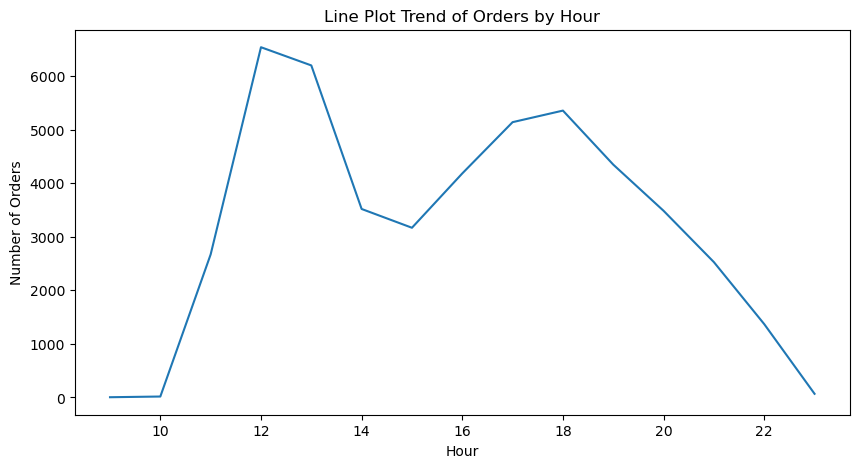

In [164]:
# LinePlot to see the hour trend of order by hour
df['hour'] = hr
hour_orders = df.groupby('hour')['order_id'].count()

plt.figure(figsize=(10,5))
plt.plot(hour_orders.index, hour_orders.values)

plt.title('Line Plot Trend of Orders by Hour')
plt.ylabel('Number of Orders')
plt.xlabel('Hour')

Text(0.5, 0, 'Month')

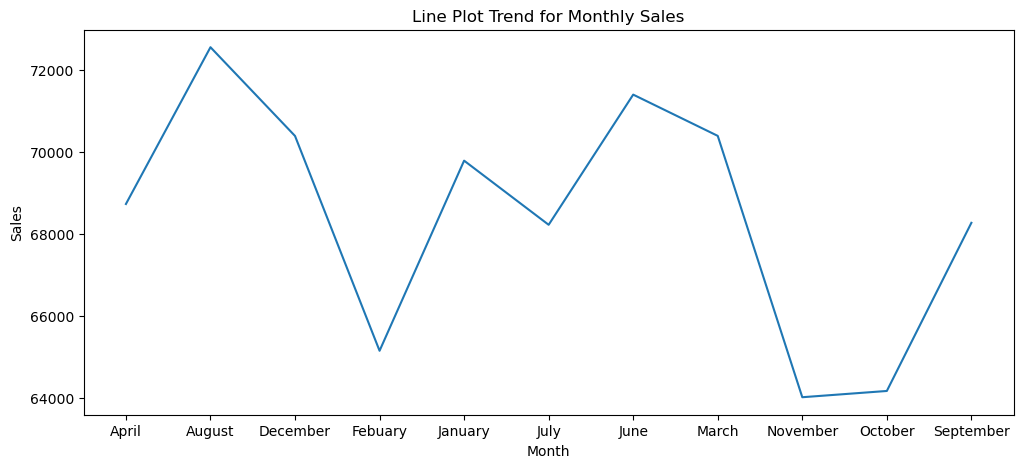

In [183]:
# LinePlot to see the hour trend of monthly sales
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.title('Line Plot Trend for Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

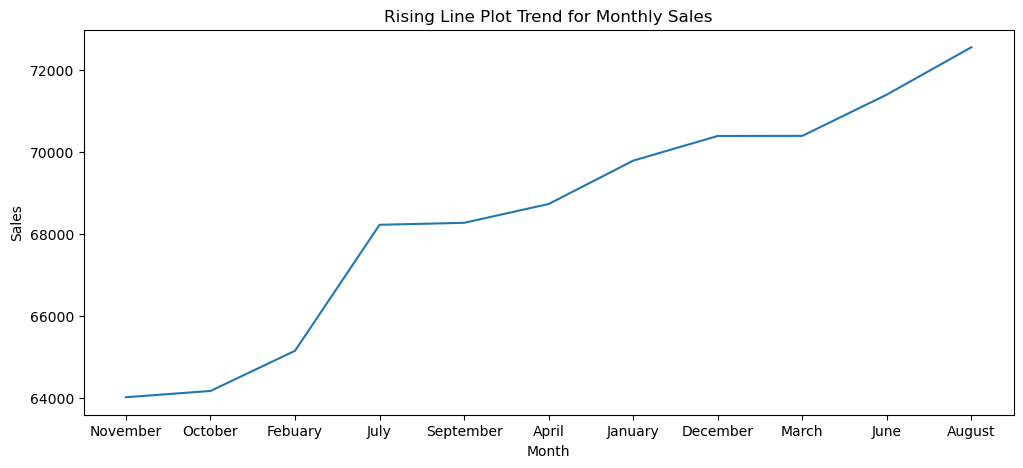

In [190]:
# LinePlot to see the hour trend of monthly sales
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.sort_values().index, monthly_sales.sort_values().values)

plt.title('Rising Line Plot Trend for Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Month')

<Axes: title={'center': 'Top 10 BestSelling Pizza Type in Quantity'}, xlabel='pizza_type_id'>

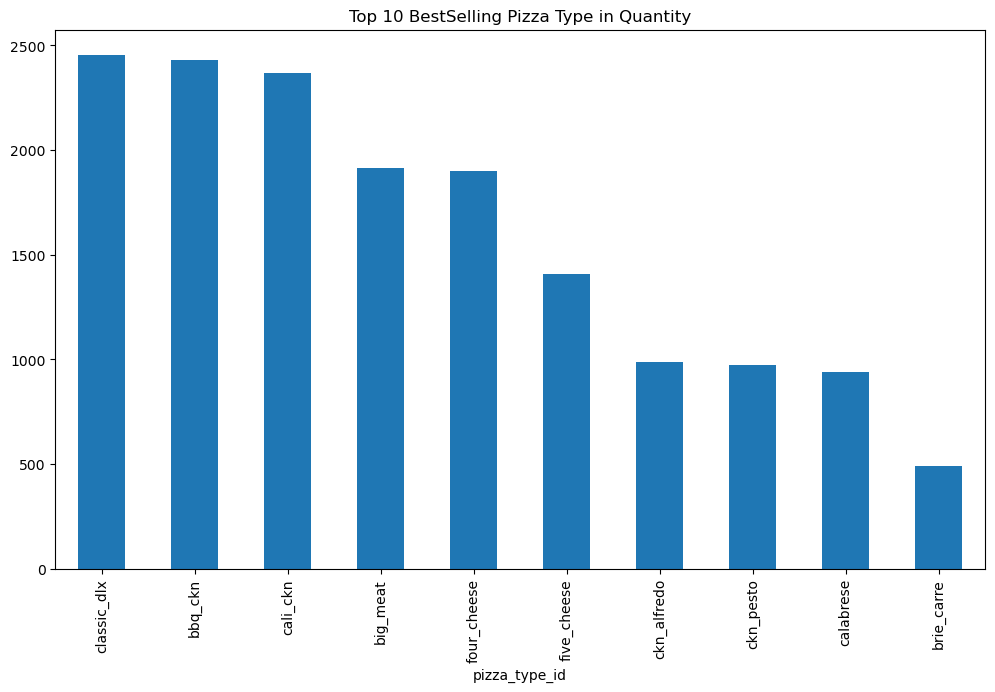

In [182]:
Q_type = df.groupby('pizza_type_id')['quantity'].sum()
Q_type.head(10).sort_values(ascending=False).plot(kind='bar', figsize=(12,7), title='Top 10 BestSelling Pizza Type in Quantity')

<Axes: title={'center': 'Top 10 BestSelling Pizza Type by Total Sales'}, xlabel='pizza_type_id'>

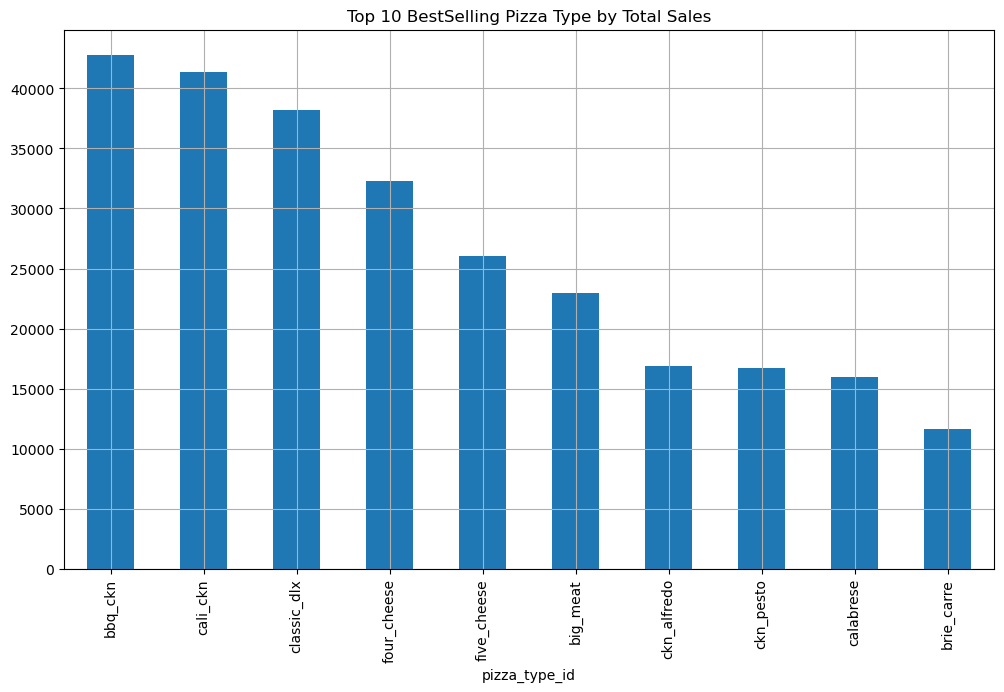

In [188]:
P_type = df.groupby('pizza_type_id')['total_bill'].sum()
P_type.head(10).sort_values(ascending=False).plot(kind='bar', figsize=(12,7), title='Top 10 BestSelling Pizza Type by Total Sales', grid=True)

# The End!

*ngl, learned a couple of things with this task, had series of wrong code, but afterall, it figured it out,, couldn't be more proud.*